#### imports

In [7]:
import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt

from src.scripts import filters

#### path definitions

In [ ]:
path_df_channels_en = 'data/df_channels_en.tsv'
# TODO: not used yet path_df_channels_filtered = 'data/filtered_df_channels_en.csv'

path_df_timeseries = 'data/df_timeseries_en.tsv'

path_yt_metadata_feather = 'data/yt_metadata_helper.feather'
path_yt_metadata_feather_filtered = 'data/filtered_yt_metadata_helper.feather.csv'

path_yt_metadata = 'data/yt_metadata_en.jsonl'
path_yt_metadata_filtered = 'data/filtered_yt_metadata.csv'

path_final_channels = 'data/final_channels.csv'
path_final_timeseries = 'data/final_timeseries.csv'
path_final_yt_metadata_feather = 'data/final_yt_metadata_helper.csv'
path_final_yt_metadata = 'data/final_yt_metadata.csv'

### strcuture of different datasets

#### df_channels_en.tsv

CSV file, having the following structure:
| **category_cc** | **join_date** | **channel**              | **name_cc**             | **subscribers_cc** | **videos_cc** | **subsriber_rank_sb** | **weights** |
|-----------------|---------------|--------------------------|-------------------------|--------------------|---------------|-----------------------|-------------|
| News & Politics | 2013-03-11    | UCcRgZlgsk5m-aDQa_d6BTkQ | NorthWestLibertyNews... | 16700              | 845           | 639043.0              | 10.0035     |
| Gaming          |    2012-01-15 | UCnnXR0VIJVpeL1wEr-bBaRw | Felix Guaman            | 112000             | 703           | 137318.0              | 5.4915      |

With:
- `category_cc`: most frequent category of the channel. One of: ['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports', 'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism', 'People & Blogs', 'News & Politics', 'Science & Technology', 'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan]
- `join_date`: join date of the channel.
- `channel`: unique channel id.
- `name_cc`: name of the channel.
- `subscribers_cc`: number of subscribers.
- `videos_cc`: number of videos.
- `subscriber_rank_sb`: rank in terms of number of subscribers.
- `weights`: weights cal



#### yt_metadata_helper.feather   (yt_metadata_helper.feather.csv, filtered_yt_metadata_helper.feather.csv)
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>categories</th>
      <th>channel_id</th>
      <th>dislike_count</th>
      <th>display_id</th>
      <th>duration</th>
      <th>like_count</th>
      <th>upload_date</th>
      <th>view_count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Film &amp; Animation</td>
      <td>UCy6sWF4taso5GtrfDGhwpBA</td>
      <td>0.0</td>
      <td>EXOviJ_EJDo</td>
      <td>68</td>
      <td>0.0</td>
      <td>2011-12-07</td>
      <td>76.0</td>
    </tr>
    <tr>
      <td>Gaming</td>
      <td>UCEPYwwuGhgA9wfO2It11OXw</td>
      <td>0.0</td>
      <td>xSKA6VX7Tdo</td>
      <td>125</td>
      <td>6.0</td>
      <td>2016-10-04</td>
      <td>198.0</td>
    </tr>
    <tr>
      <td>News &amp; Politics</td>
      <td>UCojNA7ZvnmGuIvYnm44wl3Q</td>
      <td>NaN</td>
      <td>FsucWMijKA4</td>
      <td>130</td>
      <td>NaN</td>
      <td>2010-11-18</td>
      <td>106.0</td>
    </tr>
  </tbody>
</table>
</div>

With (values were crawled from YouTube between 2019-10-29 and 2019-11-23):
- `categories`: category (self-defined when they upload a video to YouTube)
- `channel_id`: unique channel id
- `dislike_count`: dislikes of the video
- `display_id`: unique video id
- `duration`: duration of the video
- `like_count`:likes of the video.
- `upload_date`: upload date
- `view_count`: views of the video.


#### yt_metadata.jsonl
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>categories</th>
      <th>channel_id</th>
      <th>crawl_date</th>
      <th>description</th>
      <th>dislike_count</th>
      <th>display_id</th>
      <th>duration</th>
      <th>like_count</th>
      <th>tags</th>
      <th>title</th>
      <th>upload_date</th>
      <th>view_count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Film &amp; Animation</td>
      <td>UCy6sWF4taso5GtrfDGhwpBA</td>
      <td>2019-10-29</td>
      <td>description</td>
      <td>0.0</td>
      <td>EXOviJ_EJDo</td>
      <td>68</td>
      <td>0.0</td>
      <td>tags</td>
      <td>title</td>
      <td>2011-12-07</td>
      <td>76.0</td>
    </tr>
    <tr>
      <td>Gaming</td>
      <td>UCEPYwwuGhgA9wfO2It11OXw</td>
      <td>2019-10-29</td>
      <td>description</td>
      <td>0.0</td>
      <td>xSKA6VX7Tdo</td>
      <td>125</td>
      <td>6.0</td>
      <td>tags</td>
      <td>title</td>
      <td>2016-10-04</td>
      <td>198.0</td>
    </tr>
    <tr>
      <td>News &amp; Politics</td>
      <td>UCojNA7ZvnmGuIvYnm44wl3Q</td>
      <td>2019-10-29</td>
      <td>description</td>
      <td>NaN</td>
      <td>FsucWMijKA4</td>
      <td>130</td>
      <td>NaN</td>
      <td>tags</td>
      <td>title</td>
      <td>2010-11-18</td>
      <td>106.0</td>
    </tr>
  </tbody>
</table>
</div>

With (values were crawled from YouTube between 2019-10-29 and 2019-11-23):
- `categories`: category (self-defined when they upload a video to YouTube)
- `channel_id`: unique channel id
- `dislike_count`: dislikes of the video
- `display_id`: unique video id
- `duration`: duration of the video
- `like_count`:likes of the video.
- `upload_date`: upload date
- `view_count`: views of the video.

#### df_timeseries_en.tsv

| **channel**              | **category**       | **datetime** | **views**   | **delta_views** | **subs** | **delta_subs** | **videos** | **delta_videos** | **activity** |
|--------------------------|--------------------|--------------|-------------|-----------------|----------|----------------|------------|------------------|--------------|
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-03 | 202495  |           0 |  650 |   0        |      5 |            0 |        3 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-10 | 394086  |      191591 | 1046 | 396        |      6 |            1 |        1 |

With:
- `channel`: channel id.
- `category`: category of the channel as assigned by `socialblade.com` according to the last 10 videos at time of crawl.
- `datetime`: Week related to the data point.
- `views`: Total number of views the channel had this week.
- `delta_views`: Delta views obtained this week.
- `subs`: Total number of subscribers the channel had this week.
- `delta_subs`: Delta subscribers obtained this week.
- `videos`: Total number of videos the channel had this week.
- `delta_videos`: Delta videos obtained this week.
- `activity`: Number of videos published in the last 15 days.


#### youtube_comments.tsv

| **author** | **video_id**      |  **likes** |  **replies** |
|------|--------------|-------|---------|
| 1      | Gkb1QMHrGvA   |  2     |  0       |
| 1      | CNtp0xqoods   |  0     |  0       |
| 1      | 249EEzQmVmQ   |  1     |  0       |

With (data obtained at crawl time between 2019-09-12 and 2019-09-17):
- `author`: anonymized author id (unique)
- `video_id`: unique video id of the video the comment was written
- `likes`: likes for the comment
- `replies`: replies for the comment

## Filter channels by category "News & Politics" and activity

In [3]:
pl_df_f = pl.read_csv(path_df_channels_en, separator="\t")

filtered_df_ch = filters.filter_df(pl_df_f, column_name="category_cc", 
                                   value="News & Politics", cmpstr="==")

print(f"Number of channels in category 'News & Politics': {len(filtered_df_ch)}")

Number of channels in category 'News & Politics': 2263


### Load timeseries dataframe

In [ ]:
df_timeseries = pl.read_csv(path_df_timeseries, separator="\t")

filtered_df_timeseries = filters.filter_df_isin(df_timeseries, column_name="channel", 
                                                values=filtered_df_ch["channel"]) 

In [6]:
grouped_df = filtered_df_timeseries.group_by('channel').agg(pl.col('activity').mean().alias('mean_activity'))


#### Test activity filter

We try to find a threshold by looking at the plot.

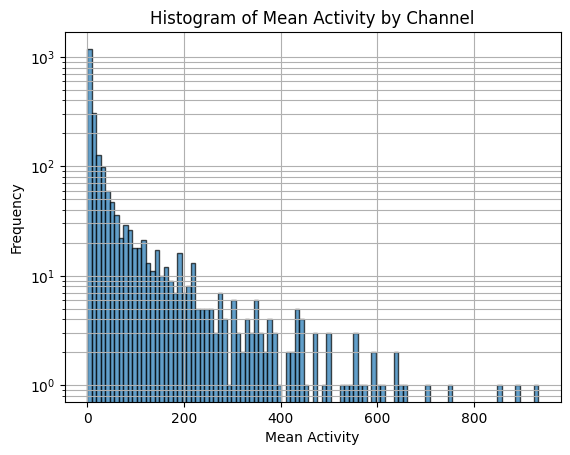

In [10]:
mean_activities = grouped_df['mean_activity'].to_list()

# Plot histogram of the mean activity values
plt.hist(mean_activities, bins=100, edgecolor="black", alpha=0.7)
plt.xlabel('Mean Activity')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Activity by Channel')
# plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both")
plt.show()

Not real cluster. So we choose reasonable activity as threshold (verifies manually) as 4 videos per day.

#### filter channels by activity

In [ ]:
# merge with channels dataframe
filtered_df_ch = filtered_df_ch.join(grouped_df, on="channel", how="inner")

filtered_df_ch = filters.filter_df(filtered_df_ch, "mean_activity", 56, ">")

# filtered_df_ch.sort(by="mean_activity", descending=True).head(10)

print("Number of channels in category 'News & Politics' with more than 4 videos per",\
      f"day: {len(filtered_df_ch)}")

Number of channels in category 'News & Politics' with more than 4 videos per day: 407


### filter yt_metadata by channels obtained before

#### Transform feather into csv

In [ ]:
df_vd_f = pd.read_feather(path_yt_metadata_feather)
# save to csv
df_vd_f.to_csv(path_yt_metadata_feather+".csv", sep="\t", index=False)

#### filter yt_metadata feather csv

In [12]:
filters.df_filter_csv_batched(path_yt_metadata_feather+".csv", path_yt_metadata_feather_filtered,
                              column_name="channel_id", values=filtered_df_ch["channel"],
                              filter_method="is_in")

#### Test if filtering worked

In [ ]:
filtered_df_metadata_feather = pl.read_csv(path_yt_metadata_feather_filtered)
# filtered_df_metadata_feather.sample(5)
print("Number of videos from channels of interest (CoI): "\
      f"{len(filtered_df_metadata_feather)}")

Number of videos from channels of interest (CoI): 6812344


#### filter yt_metadata.jsonl with channels obtained earlier

##### transform yt_metadata-en.jsonl into csv

In [9]:
filters.df_filter_jsonl_batched(path_yt_metadata, path_yt_metadata_filtered, 
                                column_name="channel_id", 
                                values=filtered_df_ch["channel"],
                                sep="\t", batch_size=500)

Empty DataFrame
Columns: [categories, channel_id, crawl_date, description, dislike_count, display_id, duration, like_count, tags, title, upload_date, view_count]
Index: []


## Jeffereys part

In [ ]:
def write_polars_to_csv(polars_dataframe, name):
# # Convert to pandas DataFrame
    polars_dataframe = polars_dataframe.to_pandas()

    # Write the DataFrame to a CSV file
    polars_dataframe.to_csv(f"{name}.csv", index=False)

In [ ]:
import keys
YOUTUBE_KEY = keys.YOUTUBE_API_KEY
OPEN_API_KEY = keys.OPENAI_API_KEY

# Get country of channel

In [ ]:
from googleapiclient.discovery import build

youtube = build('youtube', 'v3', developerKey=YOUTUBE_KEY)

def get_channel_country(channel_id):
    # Make the API request to get the channel details
    request = youtube.channels().list(
        part="snippet",
        id=channel_id
    )
    
    # Execute the request and get the response
    response = request.execute()
    
    # Check if the response contains the necessary information
    if "items" in response and len(response["items"]) > 0:
        # Extract country information from the channel snippet
        country = response["items"][0]["snippet"].get("country", "Country not available")
        return country
    else:
        return "Channel not found"


In [26]:
high_activity_channels = high_activity_channels.with_columns(
    pl.col("channel").map_elements(lambda channel_id:get_channel_country(channel_id)).alias("Channel_country")
)

C:\Users\jeffr\AppData\Local\Temp\ipykernel_25620\2021680753.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  high_activity_channels = high_activity_channels.with_columns(


In [ ]:
print(high_activity_channels.sample(100))
write_polars_to_csv(high_activity_channels, "high_activity_channels_with_country_test_2")

shape: (100, 11)
┌────────────┬───────────┬───────────┬───────────┬───┬─────────┬───────────┬───────────┬───────────┐
│ category_c ┆ join_date ┆ channel   ┆ name_cc   ┆ … ┆ weights ┆ mean_acti ┆ Is_Englis ┆ Channel_c │
│ c          ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---     ┆ vity      ┆ h         ┆ ountry    │
│ ---        ┆ str       ┆ str       ┆ str       ┆   ┆ f64     ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆           ┆           ┆           ┆   ┆         ┆ f64       ┆ bool      ┆ str       │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═════════╪═══════════╪═══════════╪═══════════╡
│ News &     ┆ 2016-09-1 ┆ UC1ocm-li ┆ Telly     ┆ … ┆ 2.921   ┆ 80.903226 ┆ null      ┆ Channel   │
│ Politics   ┆ 9         ┆ 9_XmPeAEz ┆ Khabar    ┆   ┆         ┆           ┆           ┆ not found │
│            ┆           ┆ QD0PLg    ┆           ┆   ┆         ┆           ┆           ┆           │
│ News &     ┆ 2013-01-2 ┆ UCckHqySb ┆ The Times ┆ … ┆ 2.5925  ┆ 284.29032

# Filtering out english speaking channels with CHATGPT LLM API

In [52]:
# Initialize the chunk reader
chunk_reader = pd.read_csv("../Youniverse/filtered_yt_metadata.csv", chunksize=5000)

# Read the first chunk and print the first few rows
chunk = next(chunk_reader)  # Get the first chunk
print(chunk.head())  # Display the first few rows of the first chunk

        categories                channel_id                  crawl_date  \
0  News & Politics  UCzUV5283-l5c0oKRtyenj6Q  2019-11-22 08:47:10.520209   
1  News & Politics  UCzUV5283-l5c0oKRtyenj6Q  2019-11-22 08:46:16.481889   
2  News & Politics  UCzUV5283-l5c0oKRtyenj6Q  2019-11-22 08:46:17.137786   
3  News & Politics  UCzUV5283-l5c0oKRtyenj6Q  2019-11-22 08:46:17.823119   
4  News & Politics  UCzUV5283-l5c0oKRtyenj6Q  2019-11-22 08:46:18.497042   

                                         description  dislike_count  \
0  👕 Order your shirts here: https://Teespring.co...          195.0   
1  👕 Order your shirts here: https://Teespring.co...          114.0   
2  👕 Order your shirts here: https://Teespring.co...          143.0   
3  👕 Order your shirts here: https://Teespring.co...          193.0   
4  👕 Order your shirts here: https://Teespring.co...          136.0   

    display_id  duration  like_count  \
0  MBgzne7djFU       378     47027.0   
1  AbH3pJnFgY8       278     36384.0

In [ ]:
# Load the second dataset (with the list of channel IDs to compare against)
channels_df = pd.read_csv("high_activity_channels_with_country.csv") 
channel_ids = set(channels_df['channel'].unique())  
# Initialize the chunk reader for the large CSV file
chunk_reader = pd.read_csv("../Youniverse/filtered_yt_metadata.csv", chunksize=5000)

matching_videos = []
# Dictionary to track how many videos are saved for each channel
channel_video_count = {channel_id: 0 for channel_id in channel_ids}

for chunk in chunk_reader:
    # Filter rows where channel_id in chunk is in the set of channel_ids from channels_df
    matching_rows = chunk[chunk['channel_id'].isin(channel_ids)]
    for channel_id, group in matching_rows.groupby('channel_id'):
        # If we've already saved 5 videos for this channel, skip it
        if channel_video_count[channel_id] >= 5:
            continue
        # Get the first 5 videos for this channel (or fewer if there are less than 5)
        first_5_videos = group.head(5 - channel_video_count[channel_id])  # Adjust to avoid exceeding 5
        # Add the number of videos saved for this channel
        channel_video_count[channel_id] += len(first_5_videos)
        matching_videos.append(first_5_videos)

# Convert the list into DataFrame
final_df = pd.concat(matching_videos, ignore_index=True)
final_df.to_csv('matching_videos.csv', index=False)


In [54]:
file = pd.read_csv("matching_videos.csv")
print(file.shape)

(2035, 12)


In [ ]:
import pandas as pd
from googleapiclient.discovery import build
import ollama
import datetime
import os
from openai import OpenAI
import time

client = OpenAI(api_key=OPEN_API_KEY)

# YouTube API credentials and setup
youtube = build('youtube', 'v3', developerKey=YOUTUBE_KEY)

# Define the function to detect the language using ChatGPT
def check_video_language(video_title, video_description, closed_captions=""):
    # Combine title, description, and captions to form the text to be checked
    print("title: ", video_title)
    print("description: ", video_description)

    messages = [
        {"role": "system", "content": "You are a helpful assistant who only focuses on language identification."},
        {"role": "user", "content": f"""
        Given the title and description of a YouTube video, please determine if the text is in English. Ignore URLs and non-English symbols. 
        Respond with "yes" if you think the text is in English, and "no" if you think it is not.

        Title: "{video_title}"
        Description: "{video_description}"

        Is the text in English?
        """}
    ]

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0.2,
        messages=messages
    )

    response = completion.choices[0].message.content

    print("Chat response: ", response)
    # Check if the response includes "yes"
    return "yes" in response

def check_channel_english(channel_id):
    videos = final_df.loc[final_df['channel_id'] == channel_id]
    # print(videos)
    for index, video in videos.iterrows():
        # Check if the text is in English using CHATGPT API
        is_english = check_video_language(video_title=video['title'], video_description=video['description'])
        if not is_english:
            print("channel is not english")
            return False  # If any video is not English, return False
        time.sleep(0.5)
    print("channel is english")
    return True  # If all videos checked are English, return True

In [ ]:
## TESTING 

check_channel_english("UClMs26ViHFMy7MS897Alcxw")

          categories                channel_id                  crawl_date  \
200  News & Politics  UClMs26ViHFMy7MS897Alcxw  2019-10-30 19:30:00.943882   
201  News & Politics  UClMs26ViHFMy7MS897Alcxw  2019-10-30 19:30:02.846371   
202  News & Politics  UClMs26ViHFMy7MS897Alcxw  2019-10-30 19:30:04.732614   
203  News & Politics  UClMs26ViHFMy7MS897Alcxw  2019-10-30 19:30:06.660005   
204  News & Politics  UClMs26ViHFMy7MS897Alcxw  2019-10-30 19:30:08.529586   

                                           description dislike_count  \
200                                                NaN           1.0   
201                                                NaN           0.0   
202  The Mississippi River continues to be in the m...           1.0   
203  St. Louis County Councilman Tim Fitch calls on...           1.0   
204  April is Distracted Driving month and Illinois...           1.0   

      display_id duration like_count                                    tags  \
200  -fzwj0Gq2UQ  

True

In [ ]:
# Iterate through pandas dataframe and check if channel is english
# Check each channel and store results
high_activity_channels = high_activity_channels.with_columns(
    pl.col("channel").map_elements(lambda channel_id:check_channel_english(channel_id)).alias("Is_English")
)


C:\Users\jeffr\AppData\Local\Temp\ipykernel_25620\105778879.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  high_activity_channels = high_activity_channels.with_columns(


title:  Gordon to colleagues: Don’t make side remarks at Senate hearings
description:  Senator Richard  Gordon asked colleagues on Thursday, October 3,  to  refrain from making side remarks  during an ongoing  hearing in the Senate.
Chat response:  yes
title:  Elago on Senate report: Probe Bato instead of student leaders
description:  Visit us at https://www.inquirer.net
Facebook: https://facebook.com/inquirerdotnet
Twitter: https://twitter.com/inquirerdotnet
Chat response:  yes
title:  Albayalde insists: Aquino not influenced on order vs 13 Pampanga cops
description:  Philippine National Police (PNP) chief Gen. Oscar Albayalde on Thursday maintained he could not have influenced Philippine Drug Enforcement Agency (PDEA) chief Aaron Aquino on the non-implementation of the dismissal order against the 13 Pampanga policemen.

Read more: https://newsinfo.inquirer.net/1173009/albayalde-insists-aquino-not-influenced-on-order-vs-13-pampanga-cops#ixzz61HHy5h7U
Follow us: @inquirerdotnet on Twit

In [67]:
write_polars_to_csv(high_activity_channels, "high_activity_channels_country_and_english.csv")

In [13]:
filtered = pd.read_csv("data\high_activity_channels_country_and_english.csv")

In [17]:
# filtered["Is_English"].value_counts()
english = filtered[filtered["Is_English"] == True]
print(len(english))
print("english")
print(english["Channel_country"].value_counts())

not_english = filtered[filtered["Is_English"] == False]
print("not_english")
print(not_english["Channel_country"].value_counts())

278
english
Channel_country
US                   149
IN                    49
PK                    13
Channel not found      9
CA                     8
GB                     7
NG                     6
ZA                     4
KE                     4
PH                     3
CN                     3
FR                     2
GH                     2
IL                     2
MY                     2
QA                     1
UK                     1
CH                     1
UG                     1
BZ                     1
TR                     1
DE                     1
EC                     1
BD                     1
GU                     1
PG                     1
AU                     1
LK                     1
SG                     1
TH                     1
Name: count, dtype: int64
not_english
Channel_country
IN                   81
PK                   11
US                   10
Channel not found     6
PH                    5
NP                    4
BD                    3


## Save all the final dataframes

In [40]:
df_final_channels = pl.read_csv("data/high_activity_channels_country_and_english.csv", separator=",")
df_final_channels = df_final_channels.filter((pl.col("Channel_country") == "US") & (pl.col("Is_English") == True))
df_final_channels = df_final_channels.rename({"Is_English": "is_english", "Channel_country": "channel_country"})

df_final_channels.write_csv(path_final_channels, include_header=True, separator=",")

In [ ]:
# metadata feather
filters.df_filter_csv_batched(path_yt_metadata_feather_filtered, path_final_yt_metadata_feather,
                              column_name="channel_id", values=df_final_channels["channel"],
                              filter_method="is_in", sep_in="\t", sep_out=",")

In [ ]:
# metadata
df_final_yt_metadata = pl.read_csv(path_yt_metadata_filtered, has_header=True, 
                                   separator="\t", infer_schema=False)
df_final_yt_metadata = filters.filter_df_isin(df_final_yt_metadata, "channel_id", df_final_channels["channel"])
df_final_yt_metadata.write_csv(path_final_yt_metadata, include_header=True, separator=",")


In [ ]:
# timeseries
df_final_timeseries = pl.read_csv(path_df_timeseries, separator="\t", has_header=True)
df_final_timeseries = filters.filter_df_isin(df_final_timeseries, column_name="channel", 
                                                values=df_final_channels["channel"])
df_final_timeseries.write_csv(path_final_timeseries, include_header=True, separator=",")


Summary of Filtering:

In [ ]:
print("Final Number of videos from channels of interest (CoI): "\
      f"{len(df_final_yt_metadata)}")

print("Final channels of interest (CoI): "\
      f"{len(df_final_channels)}")

Final Number of videos from channels of interest (CoI): 2548064
Final channels of interest (CoI): 149
